**What You're Aiming For**

This [➡️ dataset](https://drive.google.com/file/d/1kVnOzZ84avAAY1mA2I_Oh6FH3UPEb-_3/view) contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

**What is a Term Deposit?**

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.


**Instructions**

In this assignment you will have to take the following steps:

Import your dataset and perform initial analysis and visualization

Clean the data

Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)

# Import dataset and perform initial analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
data = pd.read_csv('/content/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


The target variable, `deposit`, indicates whether the customer subscribed to the term deposit ("yes" or "no").

Check the column names, data types and overall shape of the data


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Numerical features:** `age`,` balance`, `day`, `duration`, `campaign`, `pdays`, and `previous`.

**Categorical features:** `job`, `marital`, `education`,` default`, `housing`, `loan`, `contact`,` month`, `poutcome`, and `deposit`.


In [4]:
# checking the overall shape
print(data.shape)

(11162, 17)


11162 rows and 17 columns

Perform some basic statistics to get an idea of the distribution of the data

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Examine the target variable ("deposit") to understand the proportion of positive and negative responses.

In [6]:
data['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


A difference of 584 between the 'no' and 'yes' responses.

# Data Cleaning

1. Handling any missing values and duplicate values

2. Converting categorical columns into a suitable format, either by encoding them as integers or using one-hot encoding.

3. Scaling numerical features for the deep learning model.


In [7]:
# Check for missing values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


There are no missing values

In [8]:
# Check for duplicate values
data.duplicated().sum()

0

There are no duplicate values.

In [9]:
education = data['education'].unique()
marital = data['marital'].unique()
month = data['month'].unique()
contact = data['contact'].unique()
poutcome = data['poutcome'].unique()

print(f'''
  Education : {education}
  Marital : {marital}
  Month : {month}
  Contact : {contact}
  Poutcome : {poutcome}
''')


  Education : ['secondary' 'tertiary' 'primary' 'unknown']
  Marital : ['married' 'single' 'divorced']
  Month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
  Contact : ['unknown' 'cellular' 'telephone']
  Poutcome : ['unknown' 'other' 'failure' 'success']



In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['contact', 'education', 'marital', 'month', 'poutcome','job','default', 'housing', 'loan','deposit']

In [11]:
for col in cols:
  data[col] = le.fit_transform(data[col])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


# Visualization

1. Check the correlation between features and the target variable,'deposit'

<Axes: >

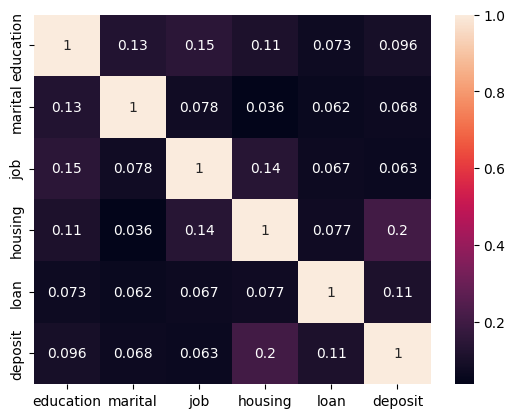

In [13]:
sns.heatmap(data[['education', 'marital','job', 'housing', 'loan','deposit']].corr().abs(),annot=True)

<Axes: >

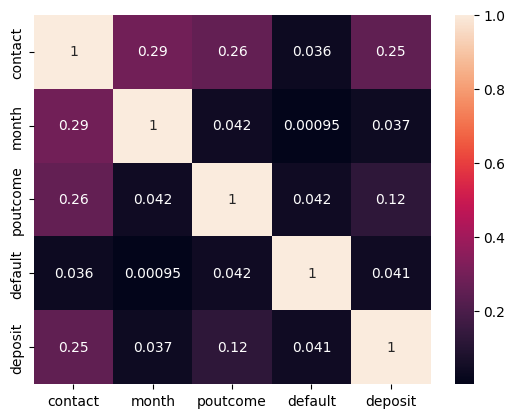

In [14]:
sns.heatmap(data[['contact', 'month', 'poutcome','default','deposit']].corr().abs(),annot=True)

<Axes: >

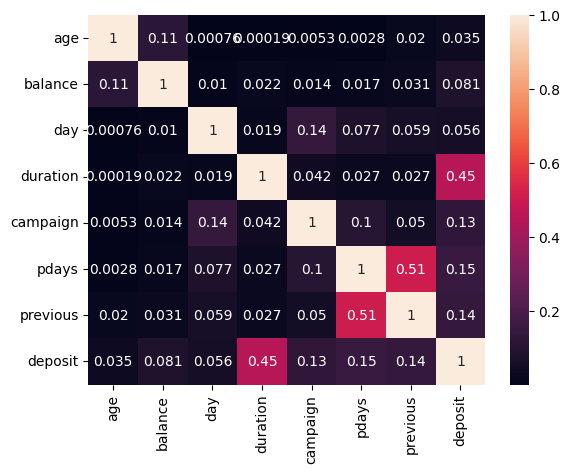

In [15]:
sns.heatmap(data[['age','balance', 'day', 'duration', 'campaign', 'pdays','previous', 'deposit']].corr().abs(),annot=True)


Most of the features show negative correlation to the target variable so we will employ another method to perform feature selection.

# Build, train, evaluate model

In [16]:
# First, separate the target variable from the rest of the features
X = data.drop('deposit', axis=1)
y = data['deposit']

In [17]:
# import the necessary libraries
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [18]:
# split the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# scale the features
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# transform the test set
X_test_scaled = scaler.transform(X_test)

In [20]:
# Initialise the model
model = Sequential()

# define the layers
model.add(Dense(128, activation='relu', input_dim=16))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# call the compile function of the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#fit the model
model.fit(X_train_scaled, y_train,epochs=30,batch_size=32,validation_data=(X_test_scaled, y_test),verbose=1)

Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8365 - loss: 0.3756 - val_accuracy: 0.8168 - val_loss: 0.4109
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.3892 - val_accuracy: 0.8173 - val_loss: 0.4118
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.3714 - val_accuracy: 0.8168 - val_loss: 0.4136
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.3695 - val_accuracy: 0.8209 - val_loss: 0.4111
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8356 - loss: 0.3770 - val_accuracy: 0.8186 - val_loss: 0.4060
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8398 - loss: 0.3682 - val_accuracy: 0.8213 - val_loss: 0.4038
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3644 - val_accuracy: 0.8204 - val_loss: 0.4049
Epoch 8/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.3619 - val_accuracy: 0.

# Test

In [23]:
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.8213165998458862
